In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [2]:
import os
import cv2
import tensorflow.keras as keras 
#from tensorflow.keras.layers import Input,Dense,Flatten,Dropout,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
#from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

In [3]:
import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
#!pip install nibabel
import nibabel as nib #reading MR images
from sklearn.model_selection import train_test_split
import math
import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
sev = glob.glob('E:/Severe/*')

In [5]:
len(sev)

22

In [6]:
mild= glob.glob('E:/Mild/*')

In [7]:
mild[1]

'E:/Mild\\S1-1-0035.nii'

In [8]:
len(mild)

22

In [9]:
rem= glob.glob('E:/Remission/*')

In [10]:
len(rem)

22

In [11]:
mod= glob.glob('E:/Moderate/*')

In [12]:
len(mod)

22

In [13]:
list=sev+mild+rem+mod

In [14]:
len(list)

88

In [15]:
new_list = np.asarray(list)

In [16]:
images = []
Severe=[]
for f in range(len(sev)):
    a = nib.load(sev[f])
    a = a.get_data()
    a = a[:,78:129,:]
    for i in range(a.shape[1]):
        Severe.append("Severe")
        images.append((a[:,i,:]))
print (a.shape)

(121, 51, 121)


C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data

In [17]:
len(Severe)

1122

In [18]:
#images = np.asarray(images)

In [19]:
len(images)

1122

In [20]:
images[2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
print(images[0].shape)

(121, 121)


In [22]:
images2 = []
Mild=[]
for f in range(len(mild)):
    a = nib.load(mild[f])
    a = a.get_data()
    a = a[:,78:129,:]
    for i in range(a.shape[1]):
        Mild.append("Mild")
        images2.append((a[:,i,:]))
print (a.shape)

(121, 51, 121)


C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data

In [23]:
print(a.shape)

(121, 51, 121)


In [24]:
len(images2)

1122

In [25]:
len(Mild)

1122

In [26]:
Mild[0]

'Mild'

In [27]:
images3 = []
Remission=[]
for f in range(len(rem)):
    a = nib.load(rem[f])
    a = a.get_data()
    a = a[:,78:129,:]
    for i in range(a.shape[1]):
        Remission.append("Remission")
        images3.append((a[:,i,:]))
print (a.shape)

(121, 51, 121)


C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data

In [28]:
len(Remission),len(images3)

(1122, 1122)

In [29]:
images4 = []
Moderate=[]
for f in range(len(mod)):
    a = nib.load(mod[f])
    a = a.get_data()
    a = a[:,78:129,:]
    for i in range(a.shape[1]):
        Moderate.append("Moderate")
        images4.append((a[:,i,:]))
print (a.shape)

(121, 51, 121)


C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
C:\Users\Dell\anaconda3\envs\labelme\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data

In [30]:
len(Moderate),len(images4)

(1122, 1122)

In [31]:
images_new=images+images2+images3+images4

In [32]:
len(images_new)

4488

In [33]:
Y_new=Severe+Mild+Remission+Moderate

In [34]:
len(Y_new)

4488

In [35]:
images_new = np.asarray(images_new)

In [36]:
images_new.shape #dimension of each image is 121x121

(4488, 121, 121)

In [37]:
images_new = images_new.reshape(-1, 121,121,1)

In [38]:
images_new.shape #preprocessing by converting each image into a matrix of size 121X121X1

(4488, 121, 121, 1)

In [39]:
m = np.max(images_new) #rescaling using max-min normalization
mi = np.min(images_new)

In [40]:
m, mi

(1.0000000591389835, 0.0)

In [41]:
images_new = (images_new - mi) / (m - mi)

In [42]:
np.min(images_new), np.max(images_new) #o/p has to be 0.0, 1.0

(0.0, 1.0)

In [43]:
temp = np.zeros([4488,124,124,1])

In [44]:
temp[:,3:,3:,:] = images_new

In [45]:
images_new = temp

In [46]:
#Y_new=np.array(Y_new)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(images_new, Y_new, test_size=0.2, random_state=0)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (124, 124, 1)
Shape of an image in X_test:  (124, 124, 1)


In [48]:
from sklearn import preprocessing
import tensorflow as tf
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 
for i,item in enumerate(le.classes_):
    print(item, '--->',i)

Mild ---> 0
Moderate ---> 1
Remission ---> 2
Severe ---> 3


In [49]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape) 
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (3590, 124, 124, 1)
X_test Shape:  (898, 124, 124, 1)
y_train Shape:  (3590, 4)
y_test Shape:  (898, 4)


In [50]:
# Initialising the CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD,RMSprop
model = Sequential()# Convolution
model.add(Convolution2D(32, (3, 3), input_shape = (124, 124, 1), activation = 'relu'))# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))# Convolution
model.add(Convolution2D(32, (3, 3), input_shape = (124, 124, 1), activation = 'relu'))# Flattening
model.add(Flatten())# Full connection
model.add(Dense(units = 256, activation = 'relu'))# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 111392)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               28516608  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

In [54]:
X_train = X_train/255
X_test= X_test/255
X_train.shape, X_train.shape

((3590, 124, 124, 1), (3590, 124, 124, 1))

In [52]:
#opt = SGD(lr=0.001, momentum=0.99, decay=0.01)
opt=RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.001)
#m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
#optimizer='rmsprop
model.compile(loss='categorical_crossentropy',
                    optimizer=opt,
                    metrics=['accuracy'])
#m1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#model.compile(optimizer='adagrad',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
#X_train = X_train.reshape(-1, 124, 124, 1)

In [57]:
#X_test = X_test.reshape(-1, 124, 124, 1)

In [53]:
history = model.fit(X_train,y_train,
                    epochs=25, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Train on 3590 samples, validate on 898 samples
Epoch 1/25
3590/3590 [==============================] - 35s 10ms/sample - loss: 1.4002 - accuracy: 0.2596 - val_loss: 1.3705 - val_accuracy: 0.3664
Epoch 2/25
3590/3590 [==============================] - 36s 10ms/sample - loss: 1.3523 - accuracy: 0.3279 - val_loss: 1.3080 - val_accuracy: 0.4421
Epoch 3/25
3590/3590 [==============================] - 36s 10ms/sample - loss: 1.2579 - accuracy: 0.4253 - val_loss: 1.2050 - val_accuracy: 0.4098
Epoch 4/25
3590/3590 [==============================] - 37s 10ms/sample - loss: 1.1433 - accuracy: 0.5033 - val_loss: 1.0518 - val_accuracy: 0.5724
Epoch 5/25
3590/3590 [==============================] - 36s 10ms/sample - loss: 1.0271 - accuracy: 0.5699 - val_loss: 0.9489 - val_accuracy: 0.5802
Epoch 6/25
3590/3590 [==============================] - 38s 11ms/sample - loss: 0.9291 - accuracy: 0.6089 - val_loss: 0.8583 - val_accuracy: 0.6325
Epoch 7/25
3590/3590 [==============================] - 38s 11ms/

In [54]:
model.save("model_sev.tf")
print("Saved model to disk")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_sev.tf\assets
Saved model to disk


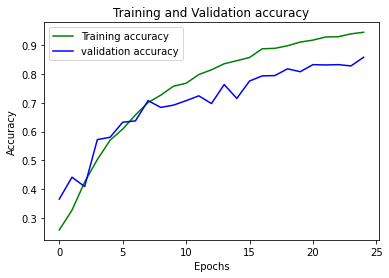

In [55]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,25)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

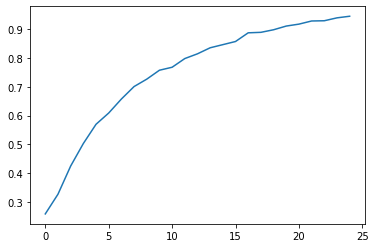

In [56]:
plt.plot(history.history['accuracy'])

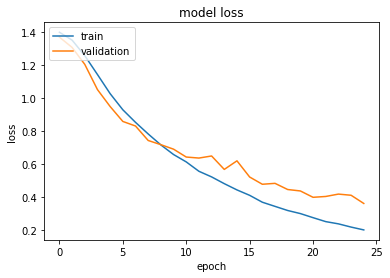

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 111392)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               28516608  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

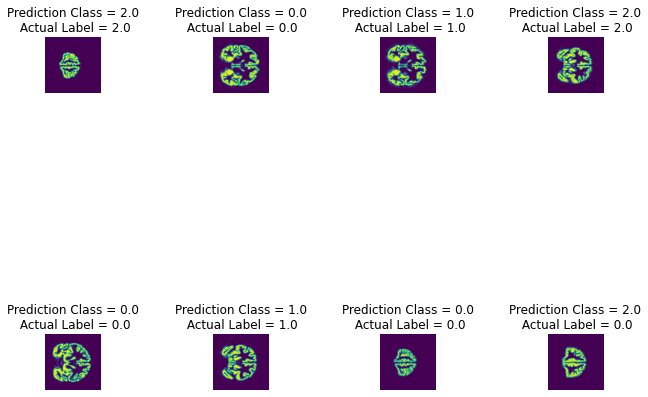

In [59]:
y_predicted=model.predict_classes(X_test)
y_actual=np.argmax(y_test,axis=1)
L = 2
W = 4
fig, axes = plt.subplots(L, W, figsize = (10,10))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=2)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       227
           1       0.85      0.90      0.88       209
           2       0.85      0.91      0.88       233
           3       0.88      0.77      0.82       229

    accuracy                           0.86       898
   macro avg       0.86      0.86      0.86       898
weighted avg       0.86      0.86      0.86       898



In [61]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("Precision Score : ",precision_score(y_actual, y_predicted, 
                                           average='micro'))
print("Recall Score : ",recall_score(y_actual, y_predicted,
                                    average='micro'))
print("F1 Score : ",f1_score(y_actual, y_predicted,
                                    average='micro'))

Precision Score :  0.8574610244988864
Recall Score :  0.8574610244988864
F1 Score :  0.8574610244988864


In [79]:
import shap

In [62]:
import shap

# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model,X_train)

Using TensorFlow backend.


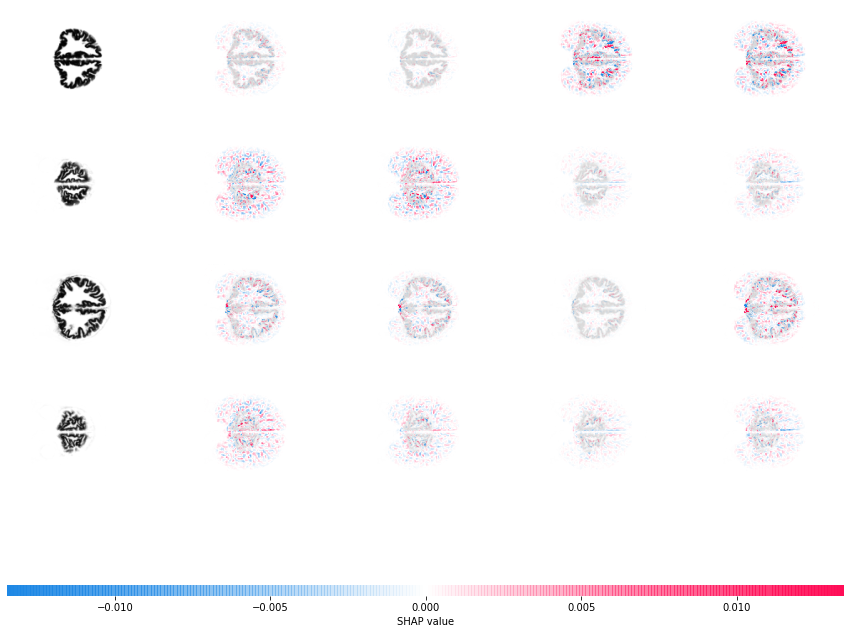

In [63]:
shap_values = explainer.shap_values(X_test[20:24])
shap.image_plot(shap_values, -X_test[20:24])

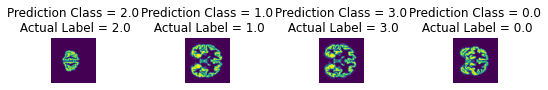

In [64]:
#to find out what input signifies
y_predicted=model.predict_classes(X_test[20:24])
y_actual=np.argmax(y_test[20:24],axis=1)
L = 1
W = 4
fig, axes = plt.subplots(L, W, figsize = (8,8))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=2)

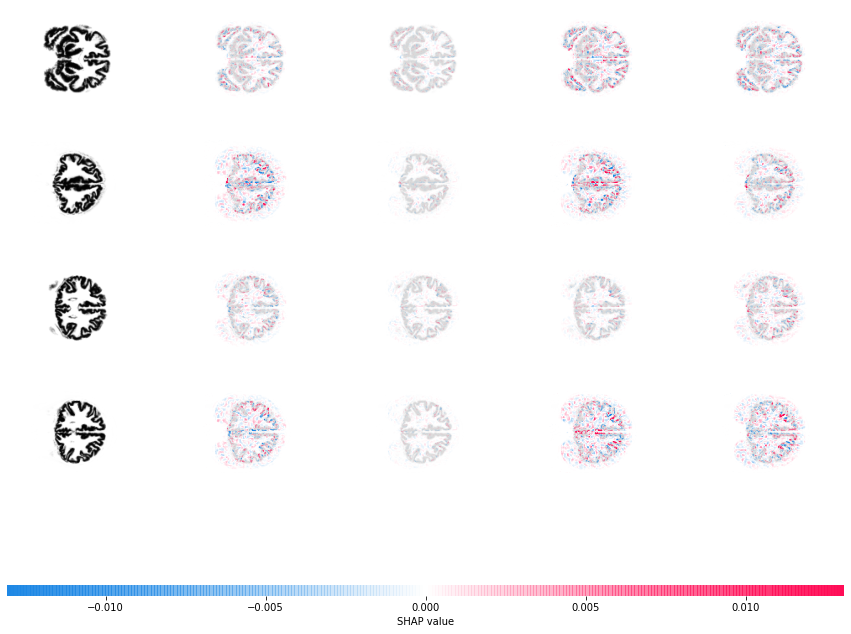

In [65]:
shap_values = explainer.shap_values(X_test[100:104])
shap.image_plot(shap_values, -X_test[100:104])

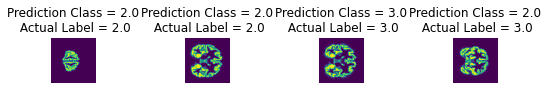

In [66]:
#to find out what input signifies
y_predicted=model.predict_classes(X_test[100:104])
y_actual=np.argmax(y_test[100:104],axis=1)
L = 1
W = 4
fig, axes = plt.subplots(L, W, figsize = (8,8))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=2)

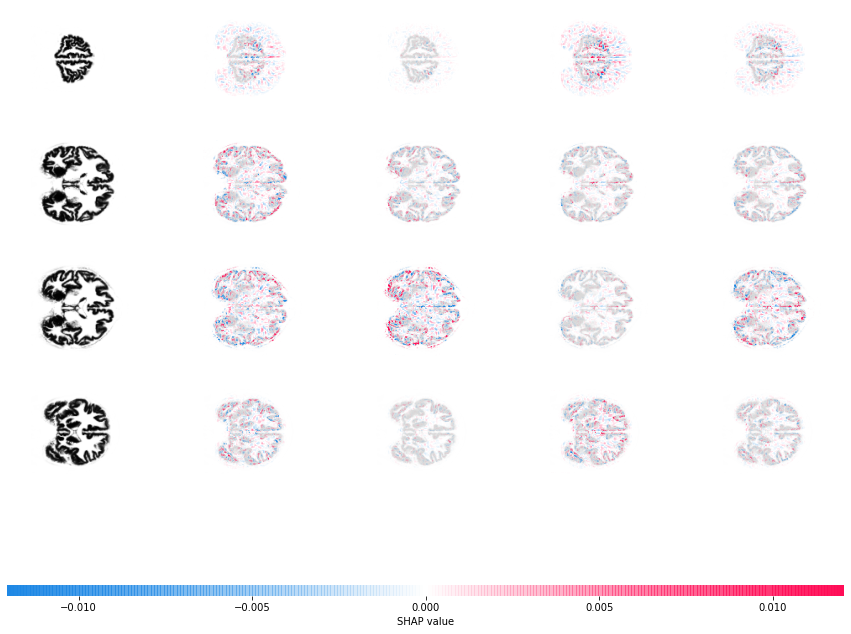

In [67]:
shap_values = explainer.shap_values(X_test[0:4])
shap.image_plot(shap_values, -X_test[0:4])

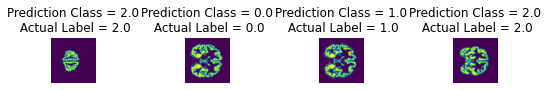

In [68]:
#to find out what input signifies
y_predicted=model.predict_classes(X_test[0:4])
y_actual=np.argmax(y_test[0:4],axis=1)
L = 1
W = 4
fig, axes = plt.subplots(L, W, figsize = (8,8))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=2)